# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [219]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [221]:
print("<Your answer here>")

<Your answer here>


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [222]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv',na_values =["?"])
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv',na_values =["?"])

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [223]:
df_test.sample(n = 10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
521,Tata Tigor 1.2 Revotron XT,2018,450000,35000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
737,Mahindra NuvoSport N8 AMT,2016,650000,50000,Diesel,Individual,Automatic,First Owner,17.45 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0
740,Toyota Innova 2.5 GX 7 STR,2012,520000,162000,Diesel,Individual,Manual,Fourth & Above Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
660,Hyundai Sonata 2.0L CRDi MT,2009,330000,180000,Diesel,Individual,Manual,First Owner,13.6 kmpl,1991 CC,142 bhp,"33@ 2,000-2,680(kgm@ rpm)",5.0
411,Hyundai i20 1.4 CRDi Era,2010,350000,90000,Diesel,Individual,Manual,Second Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
678,Maruti Vitara Brezza ZDi Plus,2019,900000,40000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
626,Maruti 800 AC,2006,50000,40000,Petrol,Individual,Manual,Third Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
513,Hyundai Grand i10 Magna,2016,400000,80000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
859,Maruti Wagon R VXI BS IV with ABS,2010,215000,120600,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
136,Mahindra Verito 1.5 D2 BSIV,2012,140000,120000,Diesel,Individual,Manual,Second Owner,21.03 kmpl,1461 CC,65 bhp,160Nm@ 2000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [224]:
# your code here
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [225]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [226]:
# your code here
df_test.describe(include = 'all')  

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [227]:
df_train.describe(include = 'all')  

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [228]:

print("Колонки mileage, engine, max_power, torque, seats имеют пробелы")
df_test.isna().sum()

Колонки mileage, engine, max_power, torque, seats имеют пробелы


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [229]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [230]:
# your code here
df_train_without_obj = df_train.drop(["selling_price"], axis=1)
duplicate = df_train_without_obj[df_train_without_obj.duplicated(keep="first")]
len(df_train_without_obj)-len(df_train_without_obj.drop_duplicates(keep="first"))


1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [231]:
# your code here
duplicate

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [232]:
# your code here
df_train = df_train.drop_duplicates(keep="first", subset=['name','year', 'km_driven', 'fuel','seller_type', 'transmission','owner','mileage','engine','max_power','torque','seats']) 
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [233]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [234]:
# your code here
df_train.reset_index(drop=True, inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [235]:
# your code here


df_train['mileage'] = df_train['mileage'].astype(str).str.replace(' kmpl', '')
df_test['mileage'] = df_test['mileage'].astype(str).str.replace(' kmpl', '')

df_train.loc[df_train['mileage'].str.contains(' km/kg', case=False), 'mileage'] = round(df_train.loc[df_train['mileage'].str.contains(' km/kg', case=False), 'mileage'].astype(str).str.replace('[^0-9.]', "").astype(float)*1.4, 2)
df_test.loc[df_test['mileage'].str.contains(' km/kg', case=False), 'mileage'] = round(df_test.loc[df_test['mileage'].str.contains(' km/kg', case=False), 'mileage'].astype(str).str.replace('[^0-9.]', "").astype(float)*1.4, 2)

df_train['mileage'] = df_train['mileage'].astype(float)
df_test['mileage'] = df_test['mileage'].astype(float)

df_train['engine'] = df_train['engine'].astype(str).str.replace(' CC', '').astype(float)
df_test['engine'] = df_test['engine'].astype(str).str.replace(' CC', '').astype(float)

null_cells = df_train['max_power'].isnull()
null_cells1 = df_test['max_power'].isnull()

df_train['max_power'] = df_train['max_power'].astype(str).mask(null_cells, np.NaN).str.replace('[^0-9.]', '')
df_test['max_power'] = df_test['max_power'].astype(str).mask(null_cells1, np.NaN).str.replace('[^0-9.]', '')

df_train['max_power'] = df_train['max_power'].astype(str).mask(null_cells, np.NaN).str.replace('', '')


df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')
df_train['max_power'] = df_train['max_power'].astype(float)

df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce')
df_test['max_power'] = df_test['max_power'].astype(float)


df_train.drop(["torque"], axis=1)
df_test.drop(["torque"], axis=1)



c:\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
c:\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [236]:
# your code here


df_train[['mileage', 'engine', 'max_power', 'seats']] = df_train[['mileage', 'engine', 'max_power', 'seats']].fillna(df_train[['mileage', 'engine', 'max_power', 'seats']].median())
df_test[['mileage', 'engine', 'max_power', 'seats']] = df_test[['mileage', 'engine', 'max_power', 'seats']].fillna(df_test[['mileage', 'engine', 'max_power', 'seats']].median())

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [237]:
print("Сиденья имеют конечное представление, так как машина не может хранить огромное количество сидений, а следовательно их лучше использовать как категориальный признак")

Сиденья имеют конечное представление, так как машина не может хранить огромное количество сидений, а следовательно их лучше использовать как категориальный признак


In [238]:
# your code here


df_test['seats'] = df_test['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

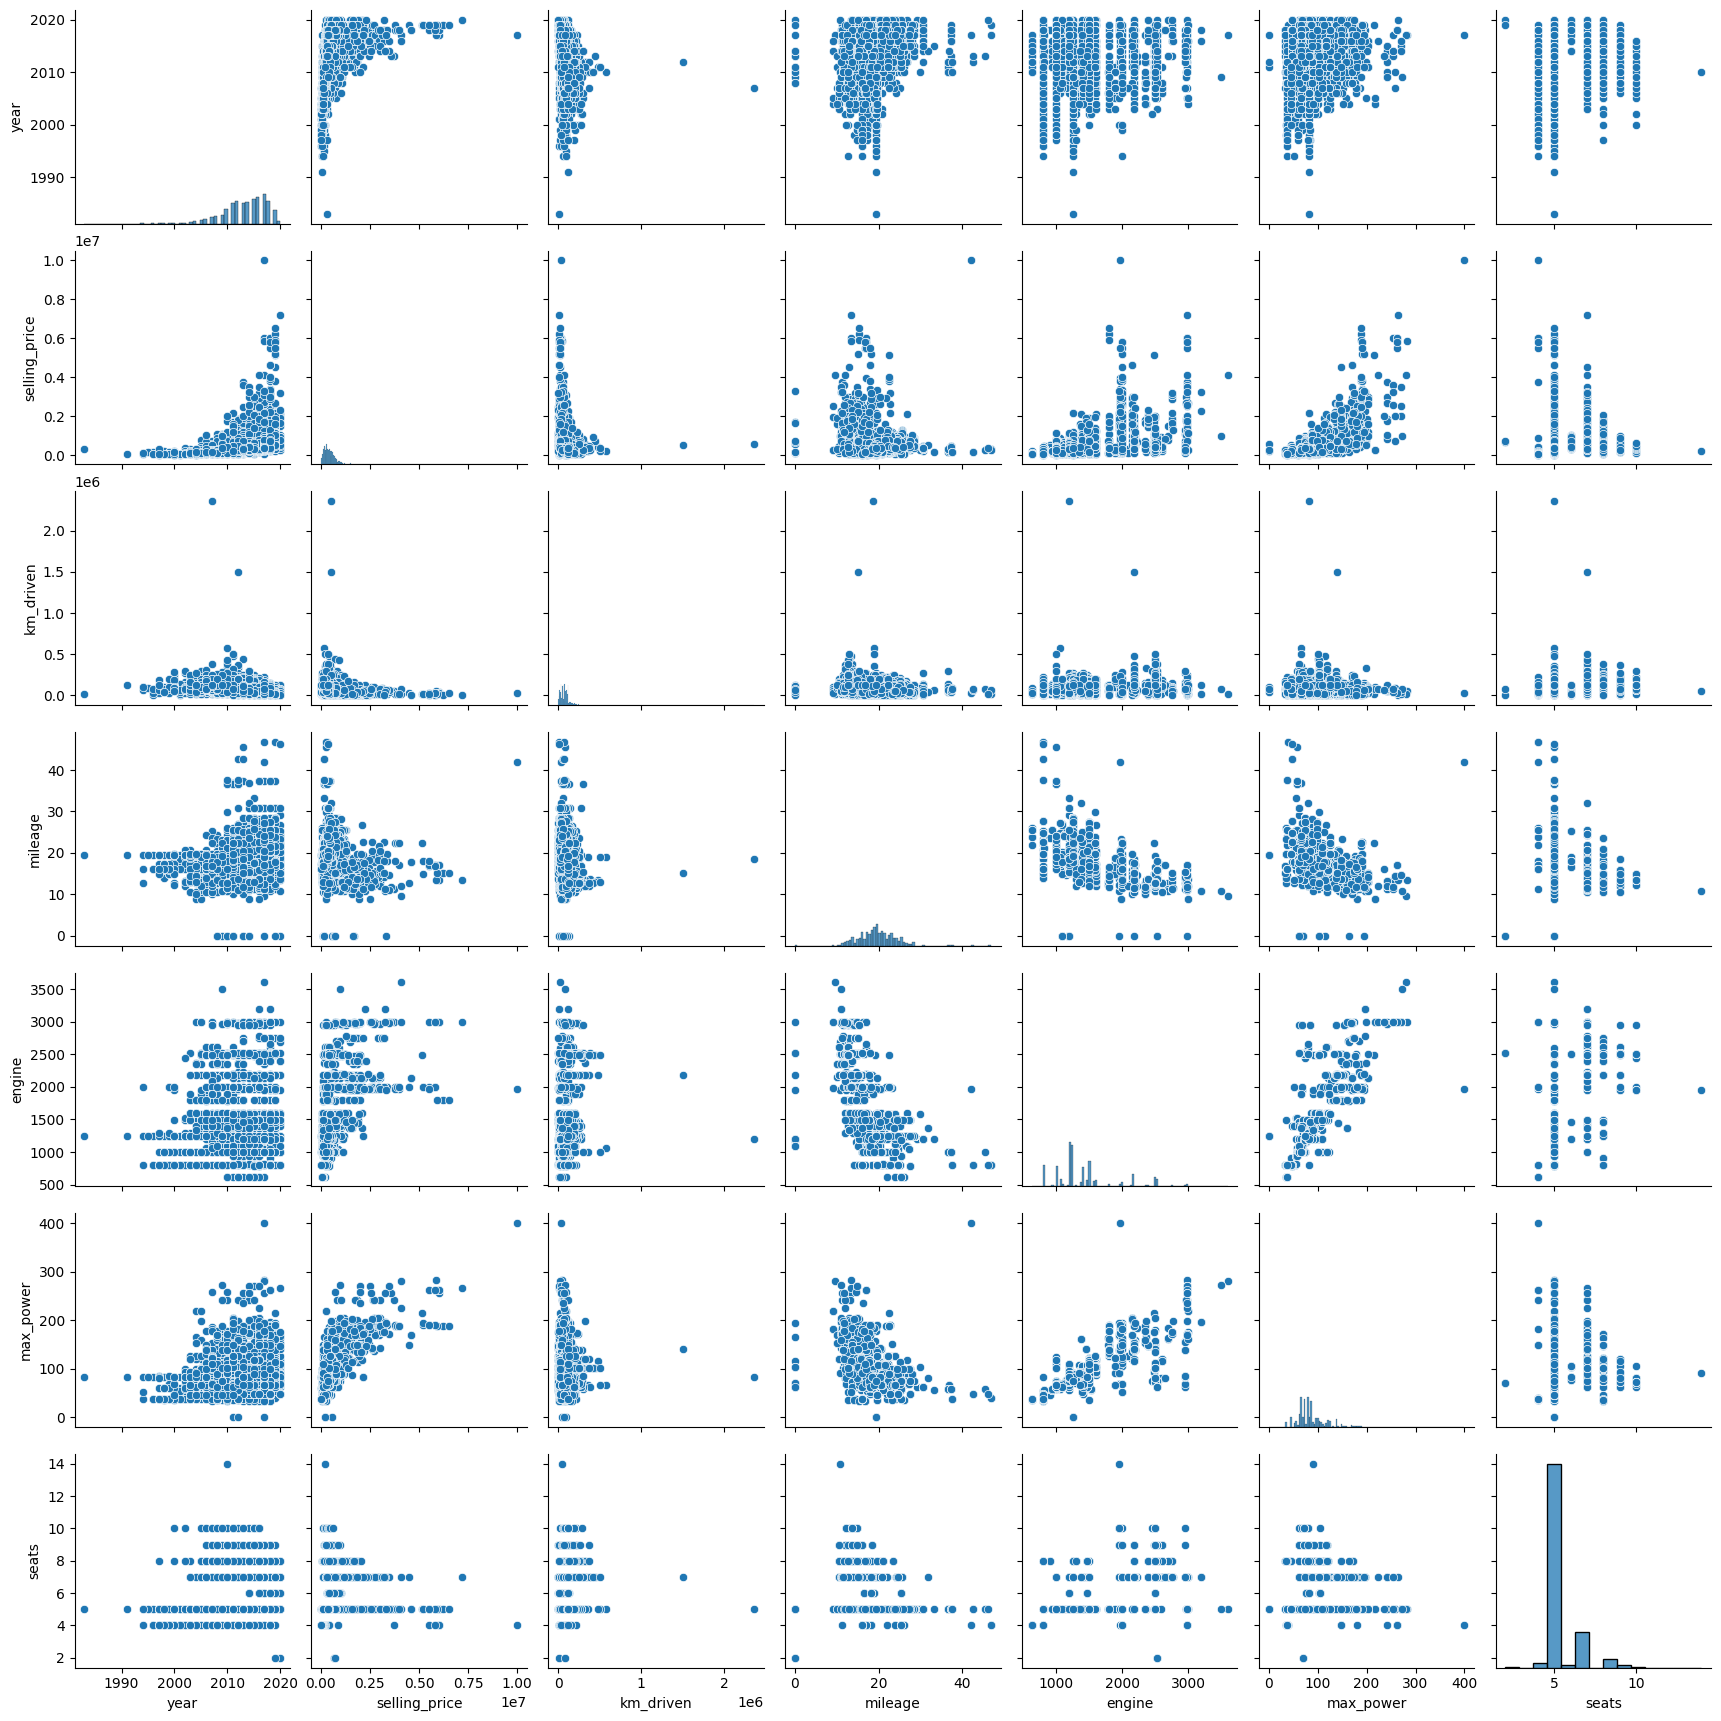

In [239]:
# your code here
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [240]:
print("Корреляция переменной с максимальной мощностью, двигателем и годом выпуска машины высока, в отличии от сидений и пройденного пути")
print("Корреляция между двигателем и мощностью высока, что верно, но так же есть корреляция двигателя с количеством сидений")

Корреляция переменной с максимальной мощностью, двигателем и годом выпуска машины высока, в отличии от сидений и пройденного пути
Корреляция между двигателем и мощностью высока, что верно, но так же есть корреляция двигателя с количеством сидений


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

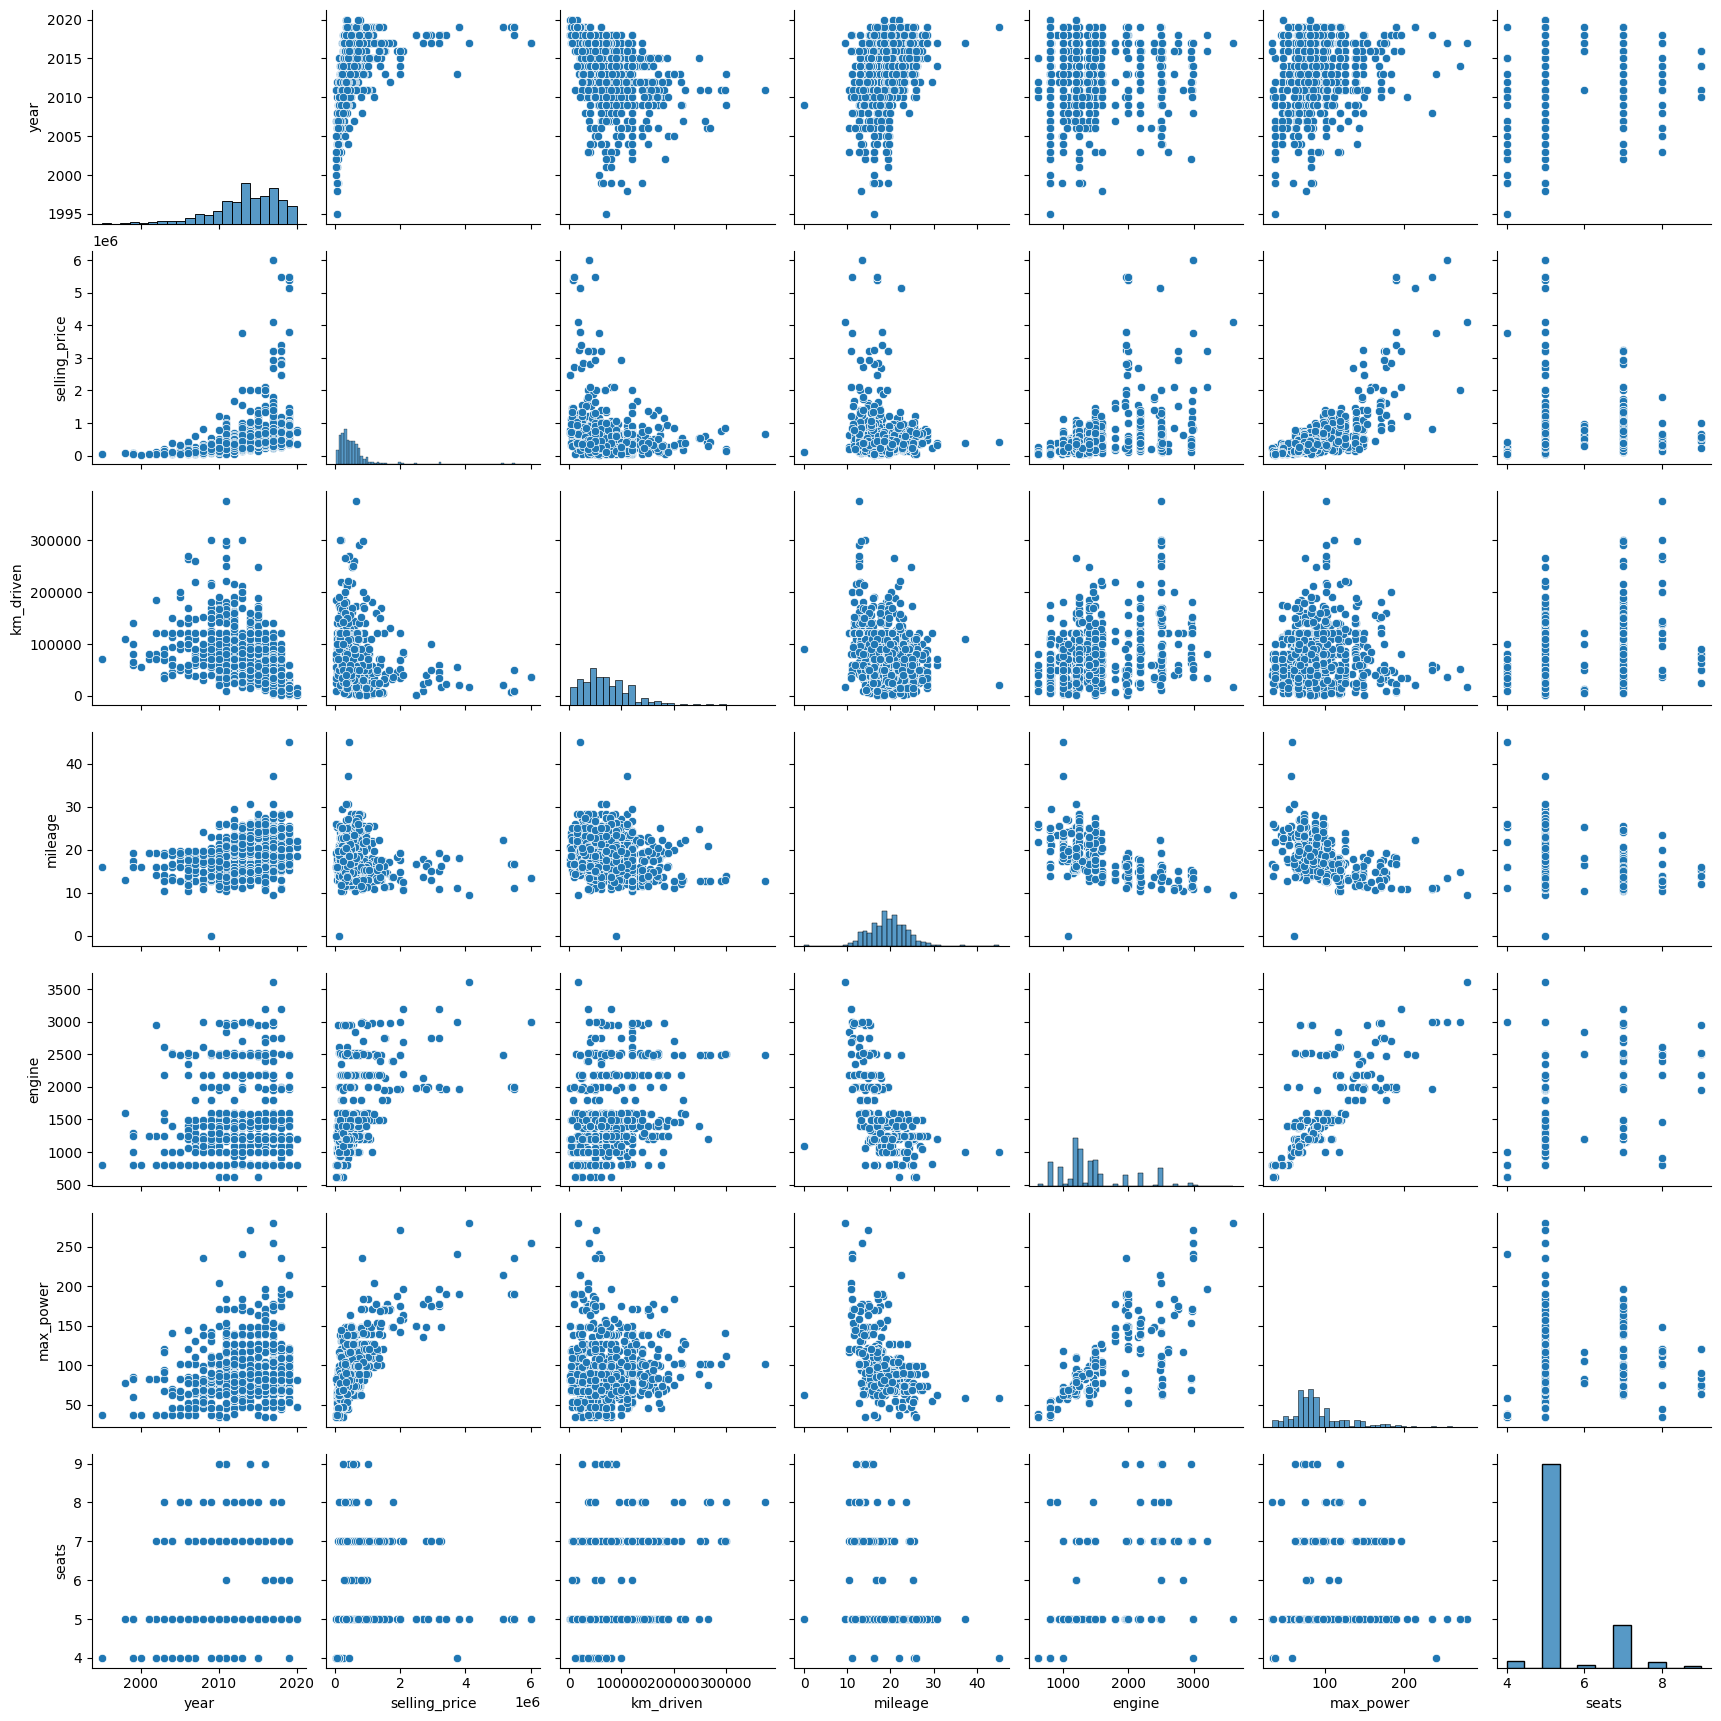

In [241]:
# your code here
sns.pairplot(df_test)

In [286]:
print('Данные примерно одинаковые')

Данные примерно одинаковые


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

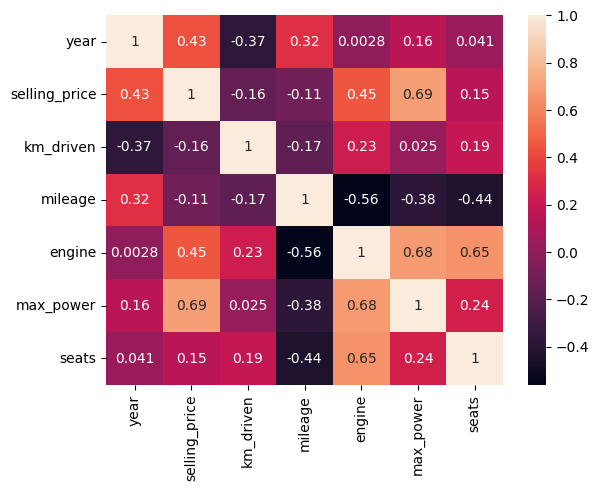

In [242]:
# your code here
df_train.dtypes
sns.heatmap(df_train[['year',	'selling_price'	,'km_driven',	'mileage'	,'engine',	'max_power'	,	'seats']].corr(), annot = True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [243]:
print("Наименее скоррелированы двигатель и киломатераж машины")
print("Сильная линейная зависимость существует между признаком двигатель и мощность")
print("Сильная линейная зависимость существует между признаком двигатель и мощность")


Наименее скоррелированы двигатель и киломатераж машины
Сильная линейная зависимость существует между признаком двигатель и мощность
Сильная линейная зависимость существует между признаком двигатель и мощность


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [244]:
# your code here

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [245]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [246]:
y_train = df_train["selling_price"]
X_train = df_train[['year'	,'km_driven',	'mileage'	,'engine',	'max_power'	,	'seats']]

In [247]:
assert X_train.shape == (5840, 6)

In [248]:
y_test = df_test["selling_price"]
X_test = df_test[['year'	,'km_driven',	'mileage'	,'engine',	'max_power'	,	'seats']]

In [249]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)
pred_mse = model.predict(X_test)

r2_score(y_test, pred_mse)

0.5943997022093851

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [251]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()

normalizer.fit(X_train)

X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)


X_train = pd.DataFrame(data=X_train)
X_test = pd.DataFrame(data=X_test)


model_standard = LinearRegression()
model_standard.fit(X_train, y_train)

print(model_standard.coef_)

pred_mse1 = model_standard.predict(X_test)

print(f'r2_score = {r2_score(y_test, pred_mse)}')

mse_test=MSE(y_test, pred_mse1)

mse_test



[153195.39203187 -44159.08283585  29018.65971613  60837.45746259
 323188.92030011 -23422.76978419]
r2_score = 0.5943997022093851


233150633345.49445

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [252]:
# your code here
print("max_power и engine оказались наиболее информативными")

max_power и engine оказались наиболее информативными


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [253]:
from sklearn.linear_model import Lasso
# your code here

model_l1 = Lasso()
model_l1.fit(X_train, y_train)

pred_l1 = model_l1.predict(X_test)


print(r2_score(y_test, pred_l1))

mse_test=MSE(y_test, pred_l1)

print(f"MSE = {mse_test}")


0.5943985180525071
MSE = 233151314032.68994


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [285]:
print('Скорее всего, занулила из-за высоких значений')

Скорее всего, занулила из-за высоких значений


(array([2., 1., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([-44159.08283585,  -7424.28252225,  29310.51779135,  66045.31810494,
        102780.11841854, 139514.91873213, 176249.71904573, 212984.51935933,
        249719.31967292, 286454.11998652, 323188.92030011]),
 <BarContainer object of 10 artists>)

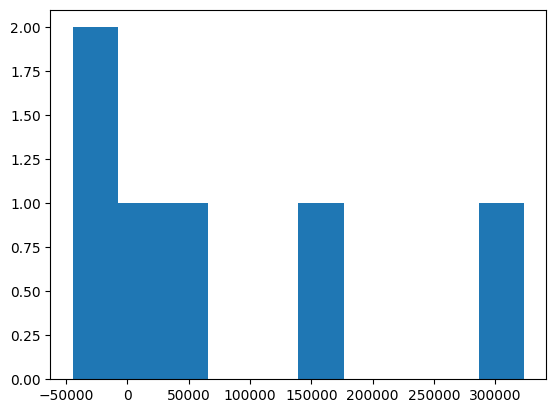

In [254]:
plt.hist(model_standard.coef_, bins=10)

(array([2., 1., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([-44157.97410808,  -7423.19538905,  29311.58332998,  66046.36204901,
        102781.14076803, 139515.91948706, 176250.69820609, 212985.47692512,
        249720.25564415, 286455.03436318, 323189.81308221]),
 <BarContainer object of 10 artists>)

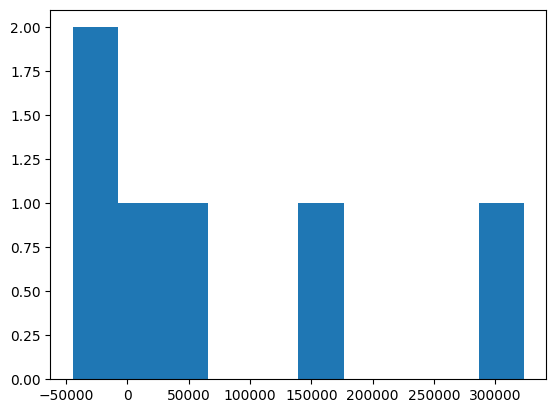

In [255]:
plt.hist(model_l1.coef_, bins=10)

(array([2., 1., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([-44157.97410808,  -7423.19538905,  29311.58332998,  66046.36204901,
        102781.14076803, 139515.91948706, 176250.69820609, 212985.47692512,
        249720.25564415, 286455.03436318, 323189.81308221]),
 <BarContainer object of 10 artists>)

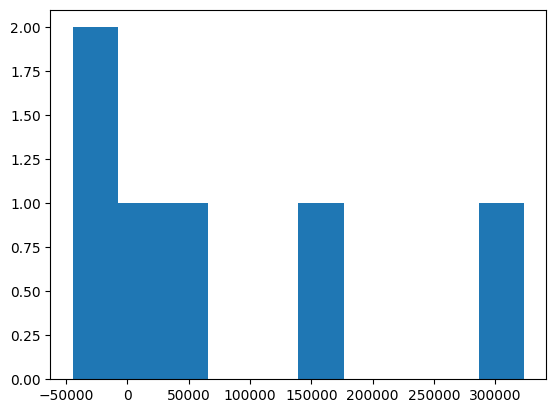

In [256]:
# your code here

from matplotlib import pyplot as pyplot
plt.hist(model_l1.coef_, bins=10)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [257]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold
# your code here

grid = GridSearchCV(estimator=Lasso(), param_grid={"alpha": 10 ** np.arange(-5, 5,0.1)},cv=10)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_estimator_

(0.5750018289192791, Lasso(alpha=25118.86431509387))

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [258]:
from sklearn.linear_model import ElasticNet

# your code here
grid_elastic = GridSearchCV(estimator=ElasticNet(), param_grid={"alpha": 10 ** np.arange(-5, 8,0.1)},cv=10)
grid_elastic.fit(X_train, y_train)
grid_elastic.best_score_, grid_elastic.best_estimator_

(0.576806035242351, ElasticNet(alpha=0.3162277660168263))

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [259]:
# your code here
print("ElasticNet: alpha=0.3162277660168263")

ElasticNet: alpha=0.3162277660168263


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



:(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [260]:
# your code here
X_train_cat = df_train.drop(["selling_price", "name", "torque"], axis=1)
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [261]:
assert X_train_cat.shape == (5840, 10)

In [262]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [263]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

X_dum = pd.get_dummies(X_train_cat, drop_first=True)
print(X_dum.shape)
X_dum.head()


(5840, 16)


,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,5,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,5,1,0,0,1,0,1,0,1,0,0
2,2010,127000,23.00,1396,90.00,5,1,0,0,1,0,1,0,0,0,0
3,2007,120000,16.10,1298,88.20,5,0,0,1,1,0,1,0,0,0,0
4,2017,45000,20.14,1197,81.86,5,0,0,1,1,0,1,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [284]:
print('не сильно, но получилось')

не сильно, но получилось


In [264]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

grid_ridge = GridSearchCV(scoring="r2", estimator=Ridge(), param_grid={"alpha": 10 ** np.arange(-5, 8,0.01)},cv=10)
grid_ridge.fit(X_dum, y_train)
grid_ridge.best_score_, grid_ridge.best_estimator_

(0.6031098984815835, Ridge(alpha=7.762471166284673))

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [265]:
# your code here
import datetime
car_old = datetime.datetime.now()

X_dum['horsetimesvolume'] = X_dum['engine'] * X_dum['max_power']

X_dum['year'] = X_dum['year'].apply(lambda x : car_old.year - x)


X_dum.drop(['km_driven', 'mileage'], axis=1)



,year,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,horsetimesvolume
0,8,1248,74.00,5,1,0,0,1,0,1,0,0,0,0,92352.00
1,8,1498,103.52,5,1,0,0,1,0,1,0,1,0,0,155072.96
2,12,1396,90.00,5,1,0,0,1,0,1,0,0,0,0,125640.00
3,15,1298,88.20,5,0,0,1,1,0,1,0,0,0,0,114483.60
4,5,1197,81.86,5,0,0,1,1,0,1,0,0,0,0,97986.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,14,1086,62.10,5,0,0,1,1,0,1,0,0,0,0,67440.60
5836,9,998,67.10,5,0,0,1,1,0,1,0,1,0,0,66965.80
5837,9,1197,82.85,5,0,0,1,1,0,1,0,0,0,0,99171.45
5838,15,1493,110.00,5,1,0,0,1,0,1,1,0,0,0,164230.00


In [266]:
grid_ridge.fit(X_dum, y_train)
grid_ridge.best_score_, grid_ridge.best_estimator_

(0.6362073967241857, Ridge(alpha=6.025595860741868))

In [267]:
linearRegression = LinearRegression()
linearRegression.fit(X_dum, y_train)

X_test = df_test.drop(["selling_price", "name", "torque"], axis=1)
X_test['horsetimesvolume'] = X_test['engine'] * X_test['max_power']
X_test['year'] = X_test['year'].apply(lambda x : car_old.year - x)
X_test = pd.get_dummies(X_test, drop_first=True)

X_real_norm_np = normalizer.fit_transform(X_dum)
X_dum = pd.DataFrame(data=X_real_norm_np)

X1_real_norm_np = normalizer.fit_transform(X_test)
X_test = pd.DataFrame(data=X1_real_norm_np)


y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)



c:\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


-22.519949024791973

In [268]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv',na_values =["?"])
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv',na_values =["?"])

df_train = df_train.drop_duplicates(keep="first", subset=['name','year', 'km_driven', 'fuel','seller_type', 'transmission','owner','mileage','engine','max_power','torque','seats']) 
df_train.reset_index(drop=True, inplace=True)

X_train_cat = df_train.drop(["selling_price", "name", "torque"], axis=1)
y_train_cat = df_train['selling_price']

X_test_cat = df_test.drop(["selling_price", "name", "torque"], axis=1)
y_test_cat = df_test['selling_price']

X_train_cat['mileage'] = X_train_cat['mileage'].astype(str).str.replace(' kmpl', '')
X_test_cat['mileage'] = X_test_cat['mileage'].astype(str).str.replace(' kmpl', '')

X_train_cat.loc[X_train_cat['mileage'].str.contains(' km/kg', case=False), 'mileage'] = round(X_train_cat.loc[X_train_cat['mileage'].str.contains(' km/kg', case=False), 'mileage'].astype(str).str.replace('[^0-9.]', "").astype(float)*1.4, 2)
X_test_cat.loc[X_test_cat['mileage'].str.contains(' km/kg', case=False), 'mileage'] = round(X_test_cat.loc[X_test_cat['mileage'].str.contains(' km/kg', case=False), 'mileage'].astype(str).str.replace('[^0-9.]', "").astype(float)*1.4, 2)

X_train_cat['mileage'] = X_train_cat['mileage'].astype(float)
X_test_cat['mileage'] = X_test_cat['mileage'].astype(float)

X_train_cat['engine'] = X_train_cat['engine'].astype(str).str.replace(' CC', '').astype(float)
X_test_cat['engine'] = X_test_cat['engine'].astype(str).str.replace(' CC', '').astype(float)

null_cells = X_train_cat['max_power'].isnull()
null_cells1 = X_test_cat['max_power'].isnull()

X_train_cat['max_power'] = X_train_cat['max_power'].astype(str).mask(null_cells, np.NaN).str.replace('[^0-9.]', '')
X_test_cat['max_power'] = X_test_cat['max_power'].astype(str).mask(null_cells1, np.NaN).str.replace('[^0-9.]', '')


X_train_cat['max_power'] = pd.to_numeric(X_train_cat['max_power'], errors='coerce')
X_train_cat['max_power'] = X_train_cat['max_power'].astype(float)

X_test_cat['max_power'] = pd.to_numeric(X_test_cat['max_power'], errors='coerce')
X_test_cat['max_power'] = X_test_cat['max_power'].astype(float)

X_train_cat[['mileage', 'engine', 'max_power', 'seats']] = X_train_cat[['mileage', 'engine', 'max_power', 'seats']].fillna(X_train_cat[['mileage', 'engine', 'max_power', 'seats']].median())
X_test_cat[['mileage', 'engine', 'max_power', 'seats']] = X_test_cat[['mileage', 'engine', 'max_power', 'seats']].fillna(X_test_cat[['mileage', 'engine', 'max_power', 'seats']].median())

X_test_cat['seats'] = X_test_cat['seats'].astype(int)
X_test_cat['engine'] = X_test_cat['engine'].astype(int)

X_train_cat['engine'] = X_train_cat['engine'].astype(int)
X_train_cat['seats'] = X_train_cat['seats'].astype(int)
X_train_cat

c:\python37\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\python37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
c:\python37\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
c:\python37\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: The default value of regex will change from True to False in a future version.


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [269]:
scaler = StandardScaler()

scaler.fit(X_train_cat[['km_driven','mileage', 'engine', 'max_power']])
X_train_cat[['km_driven','mileage', 'engine', 'max_power']] = scaler.transform(X_train_cat[['km_driven','mileage', 'engine', 'max_power']])
X_test_cat[['km_driven','mileage', 'engine', 'max_power']] = scaler.transform(X_test_cat[['km_driven','mileage', 'engine', 'max_power']])

X_train_cat.drop(['km_driven', 'mileage'], axis=1)
X_train_cat.drop(['km_driven', 'mileage'], axis=1)

X_train_cat['horsetimesvolume'] = X_train_cat['engine'] * X_train_cat['max_power']
X_train_cat['year'] = X_train_cat['year'].apply(lambda x : car_old.year - x)

X_test_cat['horsetimesvolume'] = X_test_cat['engine'] * X_test_cat['max_power']
X_test_cat['year'] = X_test_cat['year'].apply(lambda x : car_old.year - x)


X_dum_train = pd.get_dummies(X_train_cat, drop_first=True)
X_dum_test = pd.get_dummies(X_test_cat, drop_first=True)
X_dum_test



,year,km_driven,mileage,engine,max_power,seats,horsetimesvolume,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,12,1.565740,-1.312016,2.200379,0.761548,7,1.675694,1,0,0,1,0,1,0,0,0,0
1,5,-0.814974,0.461892,0.139102,0.650920,5,0.090545,1,0,0,1,0,1,0,0,0,0
2,15,2.405866,-1.572190,0.760986,1.330489,5,1.012484,0,0,1,1,0,0,0,0,0,0
3,7,1.648982,1.313368,0.141162,0.338003,5,0.047713,1,0,0,1,0,1,0,0,0,0
4,11,-0.065798,-0.720714,-0.530144,-0.724021,5,0.383835,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,0.433652,0.062171,-0.707236,-0.627617,5,0.443874,0,0,1,1,0,1,0,1,0,0
996,5,-0.398765,-0.224019,-0.478663,-0.192061,5,0.091933,0,0,1,1,0,1,0,1,0,0
997,13,-0.565249,0.816673,-0.068879,0.066175,5,-0.004558,1,0,0,1,0,1,0,0,0,0
998,10,-0.814974,0.192258,-0.478663,-0.284672,5,0.136262,0,0,1,1,0,1,0,0,0,0


In [278]:
import pickle
model_ridge = Ridge(alpha=5)
model_ridge.fit(X_dum_train, y_train_cat)
pred_mse_elasticnet = model_ridge.predict(X_dum_train)
print(f'r2_score on train = {r2_score(y_train_cat, pred_mse_elasticnet)}')
print(f'r2_score on test = {model_ridge.score(X_dum_test, y_test_cat)}')
predicted_price = pd.DataFrame(data=pred_mse_elasticnet)
predicted_price.columns = ['predicted price']
result_data = df_train.join(predicted_price)

filename = 'finalized_model.sav'
pickle.dump(model_ridge, open(filename, 'wb'))

r2_score on train = 0.6700121971955221
r2_score on test = 0.6636299486822583


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [270]:
result_data1 = result_data
result_data1['percentage'] = abs(1 - result_data1['selling_price'] / result_data1['predicted price']) * 100
len(result_data1[result_data1['percentage'] < 10])/len(result_data) * 100

21.01027397260274

In [282]:
def business_metrics():
  result_data1 = result_data
  result_data1['percentage'] = abs(1 - result_data1['selling_price'] / result_data1['predicted price']) * 100
  return len(result_data1[result_data1['percentage'] < 25])/len(result_data) * 100
business_metrics()

50.273972602739725

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [283]:
from fastapi import FastAPI, File, UploadFile
import pickle
from pydantic import BaseModel
from typing import List
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from fastapi.responses import StreamingResponse
import io
import datetime


app = FastAPI()


class Item(BaseModel):
    name: str
    year: str
    selling_price: str
    km_driven: str
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: str



@app.post("/predict_item")
def predict_item(item: Item) -> float:
    dataframe1 = pd.DataFrame(columns=['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'])
    dataframe1.loc[0] = [item.name, item.year, item.selling_price, item.km_driven, item.fuel, item.seller_type, item.transmission, item.owner, item.mileage, item.engine, item.max_power, item.torque, item.seats]
    X_test_cat = dataframe1.drop(["selling_price", "name", "torque"], axis=1)
    y_test_cat = dataframe1['selling_price']
    X_test_cat['mileage'] = X_test_cat['mileage'].astype(str).str.replace(' kmpl', '')
    X_test_cat.loc[X_test_cat['mileage'].str.contains(' km/kg', case=False), 'mileage'] = round(X_test_cat.loc[X_test_cat['mileage'].str.contains(' km/kg', case=False), 'mileage'].astype(str).str.replace('[^0-9.]', "").astype(float)*1.4, 2)
    X_test_cat['mileage'] = X_test_cat['mileage'].astype(float)
    X_test_cat['engine'] = X_test_cat['engine'].astype(str).str.replace(' CC', '').astype(float)
    null_cells1 = X_test_cat['max_power'].isnull()
    X_test_cat['max_power'] = X_test_cat['max_power'].astype(str).mask(null_cells1, np.NaN).str.replace('[^0-9.]', '')
    X_test_cat['max_power'] = pd.to_numeric(X_test_cat['max_power'], errors='coerce')
    X_test_cat['max_power'] = X_test_cat['max_power'].astype(float)
    X_test_cat[['mileage', 'engine', 'max_power', 'seats']] = X_test_cat[['mileage', 'engine', 'max_power', 'seats']].fillna(X_test_cat[['mileage', 'engine', 'max_power', 'seats']].median())
    X_test_cat['seats'] = X_test_cat['seats'].astype(int)
    X_test_cat['engine'] = X_test_cat['engine'].astype(int)
    scaler = StandardScaler()
    scaler.fit(X_test_cat[['km_driven','mileage', 'engine', 'max_power']])
    X_test_cat[['km_driven','mileage', 'engine', 'max_power']] = scaler.transform(X_test_cat[['km_driven','mileage', 'engine', 'max_power']])
    X_test_cat.drop(['km_driven', 'mileage'], axis=1)

    car_old = datetime.datetime.now()
    X_test_cat['horsetimesvolume'] = X_test_cat['engine'] * X_test_cat['max_power']
    X_test_cat['year'] = X_test_cat['year'].apply(lambda x : car_old.year - x)
    X_dum_test = pd.get_dummies(X_test_cat, drop_first=True)


    filename = 'finalized_model.sav'
    print(X_dum_test)
    loaded_model = pickle.load(open(filename, 'rb'))
    pred_mse_elasticnet = loaded_model.predict(X_dum_test)
    return pred_mse_elasticnet


@app.post("/predict_items")
def predict_items(csv_file: UploadFile = File(...)):
    dataframe = pd.read_csv(csv_file.file)

    X_test_cat = dataframe.drop(["selling_price", "name", "torque"], axis=1)
    y_test_cat = dataframe['selling_price']
    X_test_cat['mileage'] = X_test_cat['mileage'].astype(str).str.replace(' kmpl', '')
    X_test_cat.loc[X_test_cat['mileage'].str.contains(' km/kg', case=False), 'mileage'] = round(X_test_cat.loc[X_test_cat['mileage'].str.contains(' km/kg', case=False), 'mileage'].astype(str).str.replace('[^0-9.]', "").astype(float)*1.4, 2)
    X_test_cat['mileage'] = X_test_cat['mileage'].astype(float)
    X_test_cat['engine'] = X_test_cat['engine'].astype(str).str.replace(' CC', '').astype(float)
    null_cells1 = X_test_cat['max_power'].isnull()
    X_test_cat['max_power'] = X_test_cat['max_power'].astype(str).mask(null_cells1, np.NaN).str.replace('[^0-9.]', '')
    X_test_cat['max_power'] = pd.to_numeric(X_test_cat['max_power'], errors='coerce')
    X_test_cat['max_power'] = X_test_cat['max_power'].astype(float)
    X_test_cat[['mileage', 'engine', 'max_power', 'seats']] = X_test_cat[['mileage', 'engine', 'max_power', 'seats']].fillna(X_test_cat[['mileage', 'engine', 'max_power', 'seats']].median())
    X_test_cat['seats'] = X_test_cat['seats'].astype(int)
    X_test_cat['engine'] = X_test_cat['engine'].astype(int)
    scaler = StandardScaler()
    scaler.fit(X_test_cat[['km_driven','mileage', 'engine', 'max_power']])
    X_test_cat[['km_driven','mileage', 'engine', 'max_power']] = scaler.transform(X_test_cat[['km_driven','mileage', 'engine', 'max_power']])
    X_test_cat.drop(['km_driven', 'mileage'], axis=1)

    car_old = datetime.datetime.now()
    X_test_cat['horsetimesvolume'] = X_test_cat['engine'] * X_test_cat['max_power']
    X_test_cat['year'] = X_test_cat['year'].apply(lambda x : car_old.year - x)
    X_dum_test = pd.get_dummies(X_test_cat, drop_first=True)


    filename = 'finalized_model.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    pred_mse_elasticnet = loaded_model.predict(X_dum_test)
    predicted_price = pd.DataFrame(data=pred_mse_elasticnet)
    predicted_price.columns = ['predicted price']
    result_data = dataframe.join(predicted_price)
    result = loaded_model.score(X_dum_test, y_test_cat)
    # do something with dataframe here (?)
    stream = io.StringIO()
    result_data.to_csv(stream, index = False)
    response = StreamingResponse(iter([stream.getvalue()]),
                            media_type="text/csv")
    
    response.headers["Content-Disposition"] = "attachment; filename=export.csv"

    return response

In [279]:
df_train1 = pd.read_csv('export.csv')
df_train1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,predicted price
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0,563928.189013
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,791644.824122
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0,607638.240802
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0,578788.953025
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0,110809.634575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0,7709.173638
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0,433008.952603
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,375487.652008
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0,317044.168298


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link